In [1]:
import requests
import json
import pandas as pd

## Get the consumption data from backend

In [2]:
startDate="2022-12-01"
backendUrl=f"https://exj7xp8iog.execute-api.eu-west-3.amazonaws.com/laurent/getAll/consumption?startDate={startDate}"
message=requests.get(backendUrl).json()
message

{'message': 'getAllConsumptionByDate',
 'data': [{'consumptionDate': '2022-12-30T15:29:28.225Z',
   'deviceType': 'oven',
   'deviceNumber': 1,
   'updatedAt': '2022-12-31T00:40:07.643Z',
   'createdAt': '2022-12-31T00:40:07.643Z',
   'consumption': [1, 2, 3, 4],
   'SK': 'CONSUMPTION#oven',
   'details': [],
   'PK': 'CONSUMPTION#4c7101e9-cad7-4aae-ae9d-77b451832a58',
   'id': '4c7101e9-cad7-4aae-ae9d-77b451832a58'},
  {'consumptionDate': '2022-12-30T14:29:28.225Z',
   'deviceType': 'washingMachine',
   'deviceNumber': 2,
   'updatedAt': '2022-12-31T00:40:25.656Z',
   'createdAt': '2022-12-31T00:40:25.656Z',
   'consumption': [1, 2, 3, 4],
   'SK': 'CONSUMPTION#washingMachine',
   'details': [],
   'PK': 'CONSUMPTION#5ed510ca-592b-4f09-9408-0fa6b361b6d2',
   'id': '5ed510ca-592b-4f09-9408-0fa6b361b6d2'},
  {'consumptionDate': '2022-12-30T19:29:28.225Z',
   'deviceType': 'washingMachine',
   'deviceNumber': 2,
   'updatedAt': '2022-12-31T00:40:34.018Z',
   'createdAt': '2022-12-31T00:4

In [3]:
data=pd.DataFrame(message["data"])
data.loc[:,"kwh"]=[ sum(c) for c in data.consumption]

data

,consumptionDate,deviceType,deviceNumber,updatedAt,createdAt,consumption,SK,details,PK,id,kwh
0,2022-12-30T15:29:28.225Z,oven,1,2022-12-31T00:40:07.643Z,2022-12-31T00:40:07.643Z,"[1, 2, 3, 4]",CONSUMPTION#oven,[],CONSUMPTION#4c7101e9-cad7-4aae-ae9d-77b451832a58,4c7101e9-cad7-4aae-ae9d-77b451832a58,10
1,2022-12-30T14:29:28.225Z,washingMachine,2,2022-12-31T00:40:25.656Z,2022-12-31T00:40:25.656Z,"[1, 2, 3, 4]",CONSUMPTION#washingMachine,[],CONSUMPTION#5ed510ca-592b-4f09-9408-0fa6b361b6d2,5ed510ca-592b-4f09-9408-0fa6b361b6d2,10
2,2022-12-30T19:29:28.225Z,washingMachine,2,2022-12-31T00:40:34.018Z,2022-12-31T00:40:34.018Z,"[1, 2, 3, 4]",CONSUMPTION#washingMachine,[],CONSUMPTION#fa451b84-cbf7-4b12-b2d8-992ddcdcd870,fa451b84-cbf7-4b12-b2d8-992ddcdcd870,10


<AxesSubplot:xlabel='consumptionDate'>

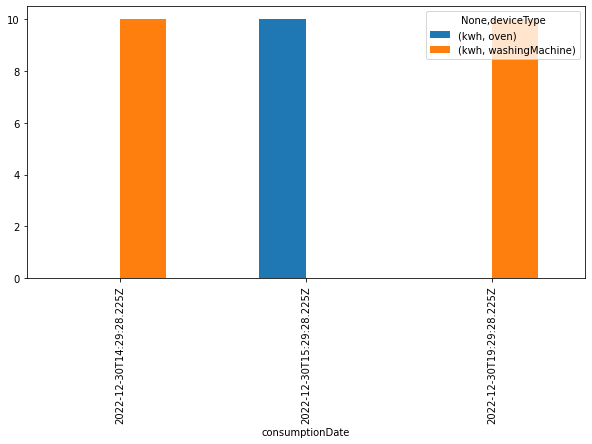

In [4]:
data.groupby(["consumptionDate","deviceType"]).agg(kwh=("kwh","sum")).unstack().fillna(0).plot.bar(figsize=(10,5))

In [5]:
data.groupby(["consumptionDate","deviceType"]).agg(kwh=("kwh","sum")).unstack()

kwh               
deviceType                oven washingMachine
consumptionDate                              
2022-12-30T14:29:28.225Z   NaN           10.0
2022-12-30T15:29:28.225Z  10.0            NaN
2022-12-30T19:29:28.225Z   NaN           10.0